Auteur : Patrick WAMPÉ

Livre : Machine Learning et Deep Learning Des bases à la conception avancée d’algorithmes

Chapitre : 13

# La régression linéaire

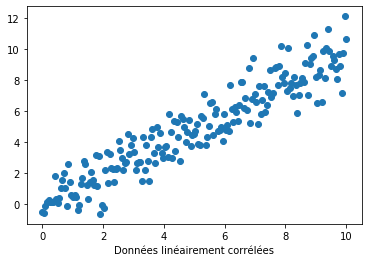

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Création d'un échantillon de 200 valeurs
m = 200
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.xlabel("Données linéairement corrélées")
plt.scatter(X, y)
plt.show()

le score du modèle est de : 0.8813296867795751


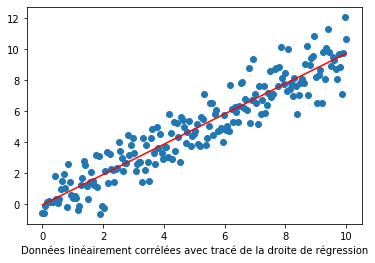

In [6]:
# Création du modèle de régression
model = LinearRegression()

# Entraînement du modèle
model.fit(X, y)
print("le score du modèle est de :", model.score(X, y))

plt.xlabel("Données linéairement corrélées avec tracé de la droite de régression")
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')
plt.show()

# La régression polynomiale

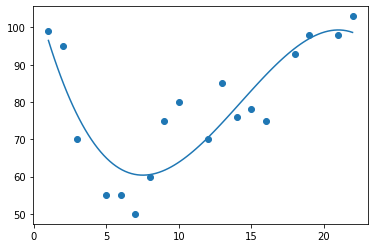

Le score du modèle est de : 0.7560704128682804


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [99,95,70,55,55,50,60,75,80,70,85,76,78,75,93,98,98,103]
model = np.poly1d(np.polyfit(x, y, 3))

# On affiche la ligne, elle commence au point 1 et se termine au point 22
ligne = np.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(ligne, model(ligne))
plt.show()

# Le score du modèle
print("Le score du modèle est de :", r2_score(y, model(x)))

# Le clustering K-moyennes

In [14]:
# On importe les modules nécessaires
from sklearn.cluster import KMeans
from sklearn import datasets
# Ce module permet de standardiser les données, notamment en les mettant à la même échelle
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# On importe le jeu de données
iris = datasets.load_iris()

# On crée un tableau de données ou dataframe
df = pd.DataFrame(iris['data'])

# On stocke les mesures des fleurs
X = scale(iris.data)

# On stocke les valeurs des types de fleurs
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
print("Les 10 premières valeurs : \n", X[0:10,])

Les 10 premières valeurs : 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [17]:
# On va appliquer la méthode du coude pour déterminer le nombre optimal de clusters
inertie_intraclasse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertie_intraclasse.append(kmeanModel.inertia_)

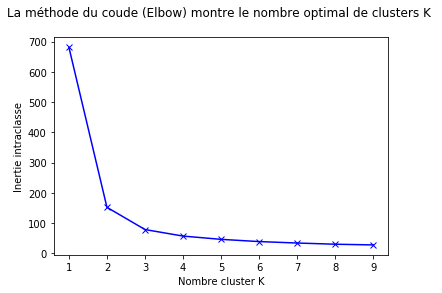

In [18]:
# On affiche un graphique qui montre l'évolution de l’inertie intraclasses avec l'augmentation du nombre de clusters plt.figure(figsize=(8, 8))
plt.plot(K, inertie_intraclasse, 'bx-')
plt.xlabel('Nombre cluster K')
plt.ylabel('Inertie intraclasse')
plt.title('La méthode du coude (Elbow) montre le nombre optimal de clusters K \n')
plt.show()

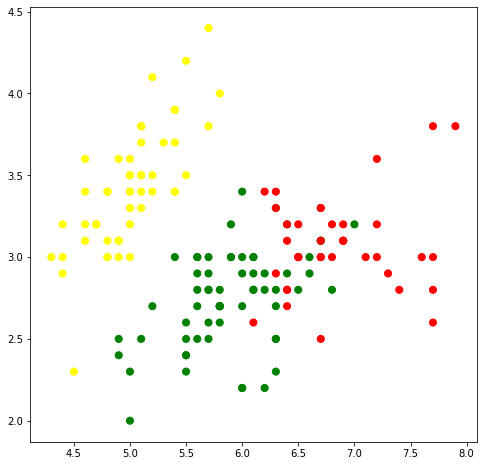

In [21]:
# On créer un objet Kmeans en l’instanciant avec 3 clusters
k_moyenne = KMeans(n_clusters=3)
# On réalise l’entraînement du modèle sur notre dataframe
k_moyenne.fit(df)

# On effectue la prédiction pour obtenir les clusters
df['k_means'] = k_moyenne.predict(df)
df['target'] = iris['target']

# On crée une visualisation qui colore chaque cluster en une couleur spécifique, green, yellow, red
color_theme = np.array(['green', 'yellow', 'red'])
plt.figure(figsize=(8, 8))
plt.scatter(df[0], df[1], c=color_theme[k_moyenne.labels_], s=50)
plt.show()

# L’analyse en composantes principales

In [22]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [23]:
# Charge le jeu de données et affiche les 10 premières lignes
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
print("L’affichage des 10 premières lignes :\n", X[0:10,])

# Création de l’objet PCA qui permet de lancer l’algorithme
pca = decomposition.PCA()

# Entraînement de l’algorithme sur les données Iris
iris_pca = pca.fit_transform(X)

# Affichage du pourcentage de variance expliquée par chaque composante principale
print("Le pourcentage de variance expliquée par chacune des quatre composantes principales :\n",
pca.explained_variance_ratio_)

# Nous voyons que la 1re explique déjà 92 % de l’information du jeu de données originel

L’affichage des 10 premières lignes :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Le pourcentage de variance expliquée par chacune des quatre composantes principales :
 [0.92461872 0.05306648 0.01710261 0.00521218]


# Notre choix de modèle

le score du modèle est de : 0.9969891263696119
Avec 1000 € vous pouvez prétendre à un appartement de [41.89366684] m2


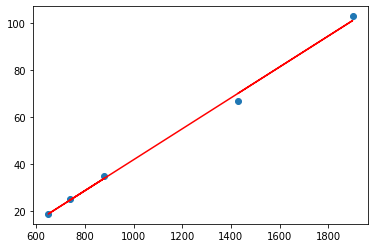

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Création d'un échantillon de 200 valeurs m = 200
X = np.array([740, 880, 650, 1900, 1430])
y = np.array([25, 35, 19, 103, 67])

# Création du modèle de régression
model = LinearRegression()

# Entraînement du modèle
model.fit(X.reshape(-1, 1), y)

print("le score du modèle est de :", model.score(X.reshape(-1, 1), y))
print("Avec 1000 € vous pouvez prétendre à un appartement de", model.predict(np.array(1000).reshape(-1, 1)), "m2")
plt.scatter(X, y)
plt.plot(X.reshape(-1, 1), model.predict(X.reshape(-1, 1)), c='red')
plt.show()